In [1]:
!pip install plotly
!pip install emoji
!pip install textblob
!pip install wordcloud

In [2]:
#importing libraries
import numpy as np
import re
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Bhara\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [3]:
#load the data
data = pd.read_csv("twitter.csv", )

data.head()

Unnamed: 0               UserId                      location  \
0           0   996111615899635714      Nottinghamshire, England   
1           1  1341762551328157696  England - Singapore - Penang   
2           2  1123248342333575169                     Sri Lanka   
3           3           3991108098                Chennai, India   
4           4  1244954351199817730                        Ibadan   

               TweetAt                                      OriginalTweet  
0  2021-08-19 09:26:02  Native of East Hull. \nFormer: police research...  
1  2021-08-19 09:23:21  Musings on colonial #Malaya & #Singapore - the...  
2  2021-08-19 09:20:10     Presenting The Interesting With Colour & Style  
3  2021-08-19 09:19:44  DT Next is the English daily from Daily Thanth...  
4  2021-08-19 09:13:26  This is the official handle of the Oyo State C...

In [4]:
data.tail()

Unnamed: 0               UserId                        location  \
6314        6314            332718371          London, United Kingdom   
6315        6315             43867037  New Westminster, British Colum   
6316        6316  1109719610792837120                             NaN   
6317        6317  1225293602466779136             Islamabad, Pakistan   
6318        6318  1109719610792837120                             NaN   

                  TweetAt                                      OriginalTweet  
6314  2021-08-11 08:16:27  Passionate interests: body-mind health, food a...  
6315  2021-08-11 08:15:31  I'm super important, you'll definitely want to...  
6316  2021-08-11 08:12:37  Dr. Akbar Niazi Teaching Hospital (ANTH) is a ...  
6317  2021-08-11 08:10:04                                  News That Travels  
6318  2021-08-11 08:09:12  Dr. Akbar Niazi Teaching Hospital (ANTH) is a ...

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6319 entries, 0 to 6318
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     6319 non-null   int64 
 1   UserId         6319 non-null   int64 
 2   location       5096 non-null   object
 3   TweetAt        6319 non-null   object
 4   OriginalTweet  6012 non-null   object
dtypes: int64(2), object(3)
memory usage: 247.0+ KB


In [6]:
data.columns

Index(['Unnamed: 0', 'UserId', 'location', 'TweetAt', 'OriginalTweet'], dtype='object')

In [7]:
data['location'].value_counts()

United States                    116
Sri Lanka                         88
India                             85
New York, NY                      72
USA                               72
                                ... 
Everywhere ;)                      1
ÜT: 40.62574,-74.13368             1
Hell on earth A.k.a. Oklahoma      1
Fresno...C-A all day               1
Canadian wilderness                1
Name: location, Length: 1663, dtype: int64

In [8]:
missing_values = pd.DataFrame()
missing_values['column'] = data.columns
missing_values['percent'] = [round(100* data[col].isnull().sum() / len(data), 2) 
                             for col in data.columns]
missing_values = missing_values[missing_values['percent']>0]

In [9]:
missing_values.head()

column  percent
2       location    19.35
4  OriginalTweet     4.86

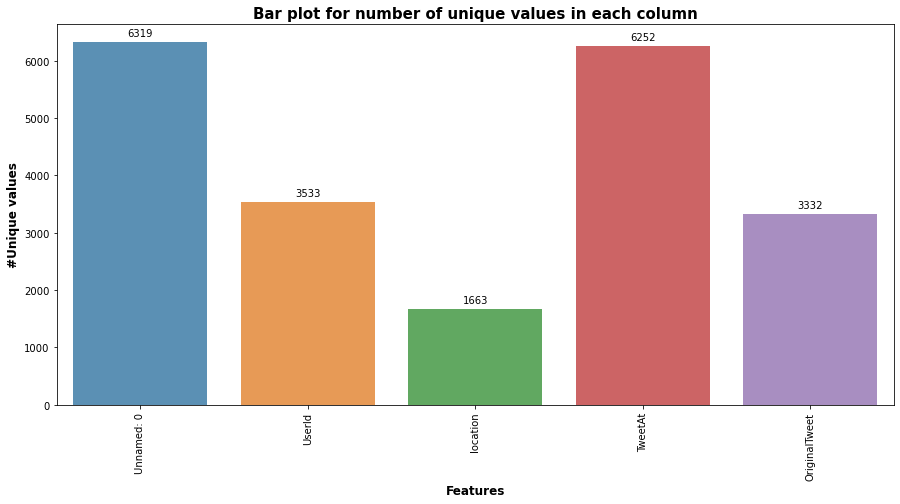

In [10]:
unique_df = pd.DataFrame()
unique_df['Features'] = data.columns
unique=[]
for i in data.columns:
    unique.append(data[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

In [11]:
loc_analysis = pd.DataFrame(data['location'].value_counts().sort_values(ascending=False))
loc_analysis = loc_analysis.rename(columns={'location':'count'})

In [12]:
import plotly.graph_objects as go

In [13]:
data_viz = {
   "values": loc_analysis['count'][:15],
   "labels": loc_analysis.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .3,
   "type": "pie"
}
layout = go.Layout(title="<b>Ratio on Location</b>", legend=dict(x=0.9, y=1, orientation="v"))

data_viz = [data_viz]
fig = go.Figure(data = data_viz, layout = layout,)
fig.update_layout(title_x=0.5)
fig.show()

In [14]:
Top_Location_Of_tweet = data['location'].value_counts().head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.set_style('white')

In [15]:
Top_Location_Of_tweet.head(10)

United States                    116
Sri Lanka                         88
India                             85
New York, NY                      72
USA                               72
South Carolina, USA               72
London, England                   64
Los Angeles, CA                   49
Washington, DC                    47
Trenches ~ underfunded school     44
Name: location, dtype: int64

In [16]:
Top_Location_Of_tweet_df=pd.DataFrame(Top_Location_Of_tweet)
Top_Location_Of_tweet_df.reset_index(inplace=True)
Top_Location_Of_tweet_df.rename(columns={'index':'Location', 'Location':'Location_Count'}, inplace=True)
Top_Location_Of_tweet_df

Location  location
0                  United States       116
1                      Sri Lanka        88
2                          India        85
3                   New York, NY        72
4                            USA        72
5            South Carolina, USA        72
6                London, England        64
7                Los Angeles, CA        49
8                 Washington, DC        47
9  Trenches ~ underfunded school        44

[Text(0, 0, 'United States'),
 Text(1, 0, 'Sri Lanka'),
 Text(2, 0, 'India'),
 Text(3, 0, 'New York, NY'),
 Text(4, 0, 'USA'),
 Text(5, 0, 'South Carolina, USA'),
 Text(6, 0, 'London, England'),
 Text(7, 0, 'Los Angeles, CA'),
 Text(8, 0, 'Washington, DC'),
 Text(9, 0, 'Trenches ~ underfunded school')]

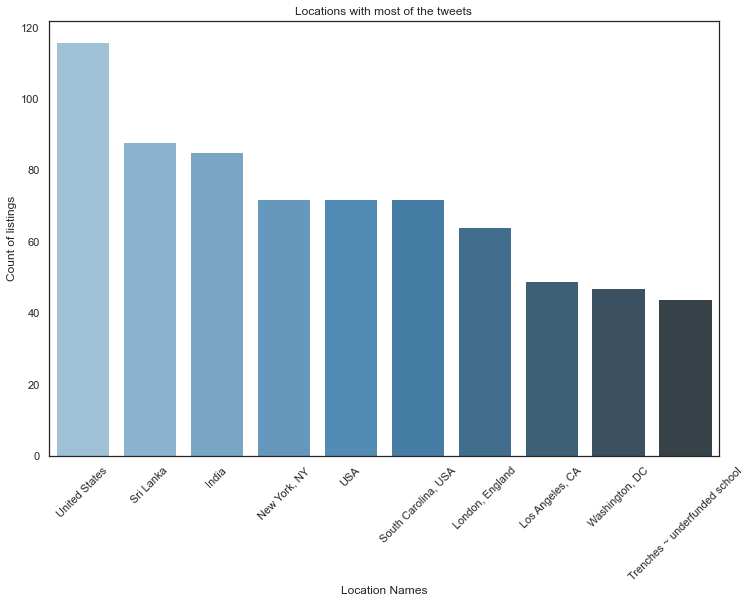

In [17]:
viz_1=sns.barplot(x="Location", y="location", data=Top_Location_Of_tweet_df,
                 palette='Blues_d')
viz_1.set_title('Locations with most of the tweets')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Location Names')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [18]:
data.dropna(inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4956 entries, 0 to 6317
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     4956 non-null   int64 
 1   UserId         4956 non-null   int64 
 2   location       4956 non-null   object
 3   TweetAt        4956 non-null   object
 4   OriginalTweet  4956 non-null   object
dtypes: int64(2), object(3)
memory usage: 232.3+ KB


In [20]:
#clean the text

#create a function to clean the tweets

"""def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)#Removed @mentions
    text = re.sub(r'#', '', text) #Removing the '#'' symbol
    text = re.sub(r'RT[\s]+', '', text) #Removing RT
    text = re.sub(r'https:\/\/.*', '', text) #Remove the hyperlink
    
    return text

data['Tweets'] = data['OriginalTweet'].apply(cleanTxt)"""

"def cleanTxt(text):\n    text = re.sub(r'@[A-Za-z0-9]+', '', text)#Removed @mentions\n    text = re.sub(r'#', '', text) #Removing the '#'' symbol\n    text = re.sub(r'RT[\\s]+', '', text) #Removing RT\n    text = re.sub(r'https:\\/\\/.*', '', text) #Remove the hyperlink\n    \n    return text\n\ndata['Tweets'] = data['OriginalTweet'].apply(cleanTxt)"

In [21]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet


data['Tweets'] = data['OriginalTweet'].apply(cleaner)

In [22]:
data.head()

Unnamed: 0               UserId                      location  \
0           0   996111615899635714      Nottinghamshire, England   
1           1  1341762551328157696  England - Singapore - Penang   
2           2  1123248342333575169                     Sri Lanka   
3           3           3991108098                Chennai, India   
4           4  1244954351199817730                        Ibadan   

               TweetAt                                      OriginalTweet  \
0  2021-08-19 09:26:02  Native of East Hull. \nFormer: police research...   
1  2021-08-19 09:23:21  Musings on colonial #Malaya & #Singapore - the...   
2  2021-08-19 09:20:10     Presenting The Interesting With Colour & Style   
3  2021-08-19 09:19:44  DT Next is the English daily from Daily Thanth...   
4  2021-08-19 09:13:26  This is the official handle of the Oyo State C...   

                                              Tweets  
0  Native of East Hull . Former : police research...  
1  on colonial & - the which formed part of the -...  
2                The Interesting With Colour & Style  
3  Next is the daily from Daily group . With a mi...  
4  This is the official handle of the State Covid...

In [23]:
data.shape

(4956, 6)

In [24]:
df = pd.DataFrame()
df['Tweets'] = data['Tweets']
df.head()

Tweets
0  Native of East Hull . Former : police research...
1  on colonial & - the which formed part of the -...
2                The Interesting With Colour & Style
3  Next is the daily from Daily group . With a mi...
4  This is the official handle of the State Covid...

In [25]:
from textblob import TextBlob

#creating a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#creating a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [26]:
#Create two columns

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [27]:
df.head()

Tweets  Subjectivity  Polarity
0  Native of East Hull . Former : police research...           0.0       0.0
1  on colonial & - the which formed part of the -...           0.0       0.0
2                The Interesting With Colour & Style           0.5       0.5
3  Next is the daily from Daily group . With a mi...           0.0       0.0
4  This is the official handle of the State Covid...           0.0       0.0

In [28]:
from wordcloud import WordCloud

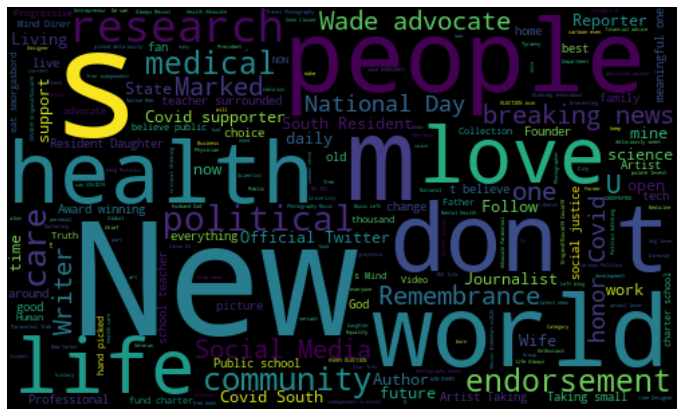

In [29]:
allWords = ' '.join(twts for twts in df['Tweets'])
wordCloud = WordCloud(width=500, height=300, random_state=21,
                     max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

df.head()

Tweets  Subjectivity  Polarity  \
0  Native of East Hull . Former : police research...           0.0       0.0   
1  on colonial & - the which formed part of the -...           0.0       0.0   
2                The Interesting With Colour & Style           0.5       0.5   
3  Next is the daily from Daily group . With a mi...           0.0       0.0   
4  This is the official handle of the State Covid...           0.0       0.0   

   Analysis  
0   Neutral  
1   Neutral  
2  Positive  
3   Neutral  
4   Neutral

In [31]:
df['Analysis'].value_counts()

Neutral     2226
Positive    2122
Negative     608
Name: Analysis, dtype: int64

In [32]:
Neutral_df = df[df['Analysis']=='Neutral']
Neutral_df.head()

Tweets  Subjectivity  Polarity  \
0  Native of East Hull . Former : police research...           0.0       0.0   
1  on colonial & - the which formed part of the -...           0.0       0.0   
3  Next is the daily from Daily group . With a mi...           0.0       0.0   
4  This is the official handle of the State Covid...           0.0       0.0   
8                          you news and on current .           0.4       0.0   

  Analysis  
0  Neutral  
1  Neutral  
3  Neutral  
4  Neutral  
8  Neutral

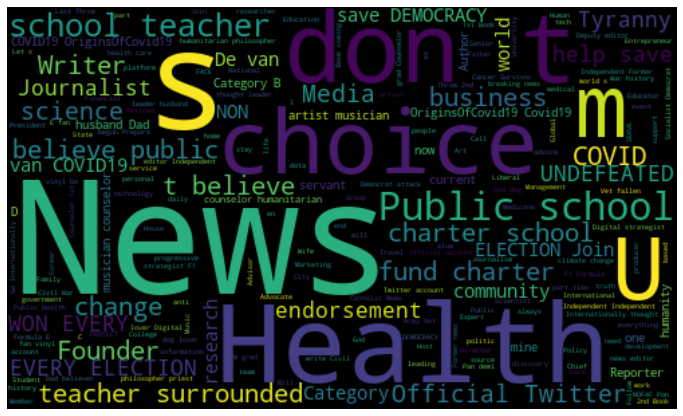

In [33]:
allWords_neutral = ' '.join(twts for twts in Neutral_df['Tweets'])
wordCloud_neutral = WordCloud(width=500, height=300, random_state=21,
                     max_font_size=119).generate(allWords_neutral)
plt.imshow(wordCloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.show()

In [34]:
Positive_df=df[df['Analysis']=='Positive']
Positive_df.head()

Tweets  Subjectivity  Polarity  \
2                 The Interesting With Colour & Style      0.500000  0.500000   
5   Health 🤗 Politics 🤗 Social history World 🌏 Cit...      0.533333  0.316667   
6         miller drinking chicken eating dress so fly      0.925000  0.100000   
10  Latest news from Stock and Global . Real - tim...      0.400000  0.233333   
18  Nature first | Connectivity second | Relations...      0.114583  0.062500   

    Analysis  
2   Positive  
5   Positive  
6   Positive  
10  Positive  
18  Positive

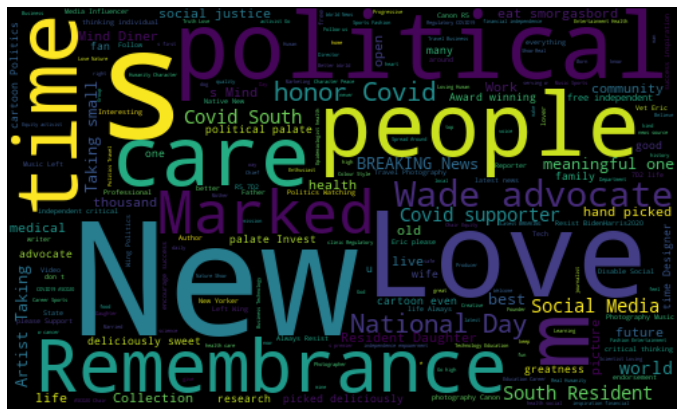

In [35]:
allWords_positive = ' '.join(twts for twts in Positive_df['Tweets'])
wordCloud_positive = WordCloud(width=500, height=300, random_state=21,
                     max_font_size=119).generate(allWords_positive)
plt.imshow(wordCloud_positive, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
Negative_df = df[df['Analysis']=='Negative']
Negative_df.head()

Tweets  Subjectivity  Polarity  \
7   Water and firm in consulting , treatment plant...           0.4      -0.2   
44  When the boundary between creation and destruc...           0.5      -0.5   
46  When the boundary between creation and destruc...           0.5      -0.5   
54  Not a militant Not an activist Opinionated abo...           0.1      -0.1   
57  I am here for truth , common sense and Electro...           0.5      -0.3   

    Analysis  
7   Negative  
44  Negative  
46  Negative  
54  Negative  
57  Negative

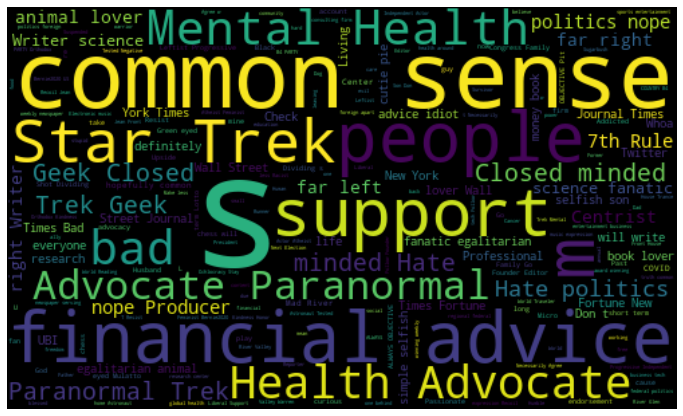

In [37]:
allWords_negative = ' '.join(twts for twts in Negative_df['Tweets'])
wordCloud_negative = WordCloud(width=500, height=300, random_state=21,
                     max_font_size=119).generate(allWords_negative)
plt.imshow(wordCloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()

In [38]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100, 1)

42.8

In [39]:
#Get the percentage of Neutral tweets
netweets = df[df.Analysis == 'Neutral']
netweets = netweets['Tweets']

round((netweets.shape[0]/df.shape[0])*100, 1)

44.9

In [40]:
#Get the percentage of Negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100, 1)

12.3

In [41]:
df[['Tweets', 'Analysis']].to_csv('Cleaned_tweets.csv')